In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
from scipy.integrate import odeint
#from numba import jit
from scipy import interpolate
from joblib import Parallel, delayed
from matplotlib import patches
from scipy.signal import find_peaks

## SINGLE-PARTICLE PIC VS 1D MODEL COMPARISION

**Results of the single-particle PIC simulation** (for the SMILEI simulation file see the attached file `single_particle.py`)

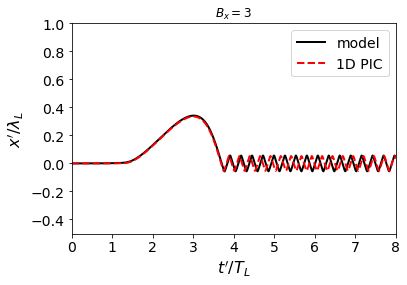

In [3]:
t_model=np.load('t_model_bx.npy')
x_model=np.load('x_model_bx.npy')


t_pic_10=np.load('t_pic_bx.npy')
x_pic_10=np.load('x_pic_bx.npy')


plt.title("$B_x = 3$")
plt.plot(t_model/2/np.pi, x_model/2/np.pi, 'k', lw=2, label = "model")
plt.plot(t_pic_10/2/np.pi-1, x_pic_10/2/np.pi-3, 'r--', lw=2, label="1D PIC")
plt.xlim(0,8)
plt.ylim(-0.5, 1.0)
plt.xlabel('$t^\prime/T_L$', fontsize=16)
plt.ylabel('$x^\prime/\lambda_L$', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplots_adjust(left=0.15, bottom=0.15)

plt.savefig('modelpic_bx.pdf')

**Parameters of the 1D model**

In [4]:
a0=20.0
a0_y=a0
a0_z=a0

phase_y=np.pi
phase_z=0

duration=4.0*2*np.pi

density = 397
thickness=0.01*2*np.pi
alpha=density*thickness
epsilon=alpha*0.5
ep = epsilon
b = 0

# pulse shapes functions
def pulse_y(xi):
    if((xi)>=0) and ((xi)<duration):
        toret = a0_y*np.sin(np.pi*(xi)/duration)**2*np.sin(xi+phase_y)
    else:
        toret = 0.0
    return toret


def pulse_z(xi):
    if((xi)>=0) and ((xi)<duration):
        toret = a0_z*np.sin(np.pi*(xi)/duration)**2*np.sin(xi+phase_z)
    else:
        toret = 0.0
    return toret

x=np.linspace(0,20*2*np.pi, 1000)
pulsey=np.zeros(len(x))
pulsez=np.zeros(len(x))

for n,xx in enumerate(x):
    pulsey[n]=pulse_y(xx)
    pulsez[n]=pulse_z(xx)
    
# for RK4 we assume:
# xi = t-x
# y0 -> h(xi)
# y1 -> x(xi)
# y2 -> y(xi)
# y3 -> z(xi)

sw=1.

# defining the force vector for odeint
# note that restoring force is smoothed using the tanh
def f(y,xi):
    ay = pulse_y(xi)
    az = pulse_z(xi)
    u_perp_sqr = (ay-epsilon*y[2]-b*y[3])**2+(az-epsilon*y[3]+b*y[2])**2
    restoring_field=np.tanh(y[1]/(thickness/4))
    
    f0 = epsilon*(restoring_field-u_perp_sqr/(1+u_perp_sqr))
    f1 = 0.5/y[0]**2*(1-y[0]**2+u_perp_sqr)
    f2 = 1./y[0]*(ay-epsilon*y[2]-b*y[3])
    f3 = 1./y[0]*(az-epsilon*y[3]+b*y[2])
    return [f0,f1,f2,f3]



Time=20
Npercycle=1000
NofTS=Time*Npercycle
xi_end=Time*2*np.pi

xi = np.linspace(0, xi_end, NofTS)
dxi=xi[1]-xi[0]

y0=[1.0,0.0,0.,0.]

sol = odeint(f, y0, xi)

h=sol[:,0]
x=sol[:,1]
y=sol[:,2]
z=sol[:,3]

## SOLUTION OF THE ODE FOR DIFFERENT $B_x$

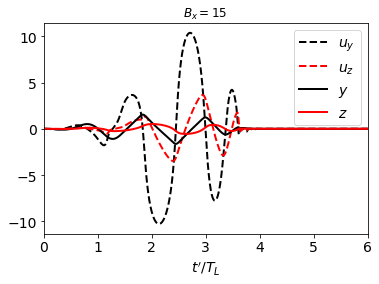

In [5]:
a0=20.0
a0_y=a0
a0_z=a0

phase_y=np.pi
phase_z=0

duration=4.0*2*np.pi

density = 300
thickness=0.01*2*np.pi
alpha=density*thickness
epsilon=alpha*0.5
ep = epsilon
b = 15

sol = odeint(f, y0, xi)
h=sol[:,0]
x=sol[:,1]
y=sol[:,2]
z=sol[:,3]

ux=np.gradient(x,xi)*h
uy=np.gradient(y,xi)*h
uz=np.gradient(z,xi)*h



plt.title("$B_x = 15$")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$t^\prime/T_L$', fontsize=14)

plt.plot(xi/2/np.pi+sw*x/2/np.pi, uy, 'k--', label='$u_y$', lw=2)
plt.plot(xi/2/np.pi+sw*x/2/np.pi, uz, 'r--', label='$u_z$', lw=2)
#plt.plot(xi/2/np.pi+sw*x/2/np.pi, ux, 'g', label='$u_x$', lw=5)
plt.plot(xi/2/np.pi+sw*x/2/np.pi, y, 'k', label='$y$', lw=2)
plt.plot(xi/2/np.pi+sw*x/2/np.pi, z, 'r', label='$z$', lw=2)
plt.legend(fontsize=14)#,bbox_to_anchor=(0.15, 0.42, 0.79, 0.5))
plt.xlim(0,6)

plt.subplots_adjust(left=0.15, bottom=0.15)

plt.savefig('b15.pdf')


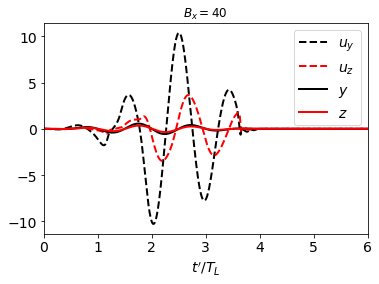

In [6]:
a0=20.0
a0_y=a0
a0_z=a0

phase_y=np.pi
phase_z=0

duration=4.0*2*np.pi

density = 300
thickness=0.01*2*np.pi
alpha=density*thickness
epsilon=alpha*0.5
ep = epsilon
b = 40

sol = odeint(f, y0, xi)
h=sol[:,0]
x=sol[:,1]
y=sol[:,2]
z=sol[:,3]

plt.title("$B_x = 40$")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$t^\prime/T_L$', fontsize=14)

plt.plot(xi/2/np.pi+sw*x/2/np.pi, uy, 'k--', label='$u_y$', lw=2)
plt.plot(xi/2/np.pi+sw*x/2/np.pi, uz, 'r--', label='$u_z$', lw=2)
#plt.plot(xi/2/np.pi+sw*x/2/np.pi, ux, 'g', label='$u_x$', lw=5)
plt.plot(xi/2/np.pi+sw*x/2/np.pi, y, 'k', label='$y$', lw=2)
plt.plot(xi/2/np.pi+sw*x/2/np.pi, z, 'r', label='$z$', lw=2)
plt.legend(fontsize=14)#,bbox_to_anchor=(0.15, 0.42, 0.79, 0.5))
plt.xlim(0,6)

plt.subplots_adjust(left=0.15, bottom=0.15)

plt.savefig('b30.pdf')


## SPECTRUM OF THE REFLECTED ELECTRIC FIELD FOR DIFFERENT $B_x$
## REFLECTED PULSE AND ELLIPTICITIES: 1D MODEL VS. 2D PIC

In [40]:
#for frequencies.eps
#a0_range = [35.]
#b_range = [30., 60., 150.]
##################################################
##################################################

#for 3by2.eps
b_range = [-19]
a0_range = [20.]
phase_y=np.pi+np.pi/2
phase_z=0+np.pi/2
##################################################
##################################################

#for parameters.eps
#b_range = np.arange(0, 200, 2, dtype=np.float32)
#a0_range = np.arange(0, 200, 2, dtype=np.float32)
#################################################
#################################################

density = 400
thickness=0.01*2*np.pi
alpha=density*thickness
epsilon=alpha*0.5

res = np.meshgrid(b_range, a0_range)
res = np.stack(res, -1).reshape(-1, 2)

def f(y,xi, a0, epsilon, b):
    ay = pulse_y(xi, a0)
    az = pulse_z(xi, a0)
    u_perp_sqr = (ay-epsilon*y[2]-b*y[3])**2+(az-epsilon*y[3]+b*y[2])**2
    restoring_field=np.tanh(y[1]/(thickness/4))
    
    f0 = epsilon*(restoring_field-u_perp_sqr/(1+u_perp_sqr))
    f1 = 0.5/y[0]**2*(1-y[0]**2+u_perp_sqr)
    f2 = 1./y[0]*(ay-epsilon*y[2]-b*y[3])
    f3 = 1./y[0]*(az-epsilon*y[3]+b*y[2])
    return [f0,f1,f2,f3]

def pulse_y(xi, a0):
    if((xi)>=0) and ((xi)<duration):
        toret = a0*np.sin(np.pi*(xi)/duration)**2*np.sin(xi+phase_y)
    else:
        toret = 0.0
    return toret


def pulse_z(xi, a0):
    if((xi)>=0) and ((xi)<duration):
        toret = a0*np.sin(np.pi*(xi)/duration)**2*np.sin(xi+phase_z)
    else:
        toret = 0.0
    return toret

def pulse_experiment(b, a0, i):
    
    sol = odeint(f, y0, xi, args=(a0,epsilon,b))

    h=sol[:,0]
    x=sol[:,1]
    y=sol[:,2]
    z=sol[:,3]
    
    ux=np.gradient(x,xi)*h
    uy=np.gradient(y,xi)*h
    uz=np.gradient(z,xi)*h

    gamma=np.sqrt(1+ux**2+uy**2+uz**2)
    vx = ux/gamma
    gamma_x=1./np.sqrt(1-vx**2)
    
    Eydetector = epsilon*uy/gamma*gamma_x**2
    Ezdetector = epsilon*uz/gamma*gamma_x**2

    t=xi+x
    tdetector = t+x
    Ey_interp=np.interp(t, tdetector, Eydetector)
    Ez_interp=np.interp(t, tdetector, Ezdetector)
    w=np.fft.fftfreq(int(len(Eydetector)/2), d=t[1]-t[0])
    sp_y=np.fft.fft(Ey_interp[:int(len(Eydetector)/2)])
    sp_z=np.fft.fft(Ez_interp[:int(len(Eydetector)/2)])

    spy=sp_y#_filt
    spz=sp_z#_filt

    S0=spy*np.conjugate(spy)+spz*np.conjugate(spz)
    S1=spy*np.conjugate(spy)-spz*np.conjugate(spz)
    S2=2*np.real(spy*np.conjugate(spz))
    S3=2*np.imag(spy*np.conjugate(spz))
    #print("this is twenty:",w[100]*2*np.pi)
    #print("this is hundred:", w[200]*2*np.pi)
    chi=0.5*np.arctan( (S3+1e-200)/( np.sqrt(S1**2+S2**2)+1e-200) )
    average_ellip = abs(np.mean(np.tan(chi[100:200].real)))
    
    #this is for frequencies.eps
    #return [sp_y[0:300], sp_z[0:300], w[0:300]]
    #this is for 3by2.eps
    return [w, Ey_interp, Ez_interp, abs(np.tan(chi[0:300].real)), sp_y[0:400], sp_z[0:400]]
    #this is for parameters.eps
    #return [average_ellip, a0*(b-epsilon)/(epsilon*epsilon+b*b), a0*(b+epsilon)/(epsilon*epsilon+b*b)]

In [41]:
def call_func(i):
    print(i, end=" ")
    b = res[i][0]
    a0 = res[i][1]
    return pulse_experiment(b, a0, i)

In [42]:
%%time

anss = Parallel(n_jobs=1)(delayed(call_func)(i) for i in range(0, len(res)))
#anss = np.copy(anss)

0 <class 'numpy.ndarray'>
CPU times: user 72.8 ms, sys: 499 µs, total: 73.3 ms
Wall time: 72.7 ms


In [31]:
# fig, ax = plt.subplots(1,1, figsize=(17,10))

# ax.semilogy((anss[2,2]*2*np.pi), (abs(anss[2,0])/np.amax(abs(anss[2,0]))), lw=7, color=plt.cm.tab20c(12))
# ax.semilogy((anss[2,2]*2*np.pi), (abs(anss[2,1])/np.amax(abs(anss[2,1]))), lw=7, color=plt.cm.tab20c(9))
# ax.tick_params(axis='both', labelsize=40)
# ax.set_xlabel("$\omega/\omega_L$", fontsize=40)
# ax.set_ylabel("$E_y,E_z$", fontsize=40)
# ax.set_title("$B_x=150$", fontsize=40);
# plt.savefig("1_3.png")

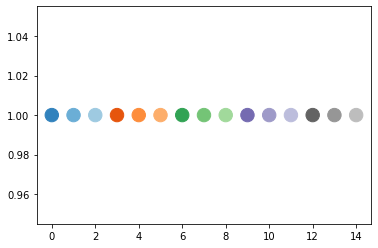

In [32]:
import matplotlib.pyplot as plt
import numpy as np

colors =  plt.cm.tab20c( (4./3*np.arange(20*3/4)).astype(int) )
plt.scatter(np.arange(15),np.ones(15), c=colors, s=180)

plt.show()

In [34]:
# fig, ax = plt.subplots(1,1, figsize=(17,10))

# ax.semilogy((anss[1,2]*2*np.pi), (abs(anss[1,0])/np.amax(abs(anss[1,0]))), lw=7, color=plt.cm.tab20c(12))
# ax.semilogy((anss[1,2]*2*np.pi), (abs(anss[1,1])/np.amax(abs(anss[1,1]))), lw=7, color=plt.cm.tab20c(9))
# ax.tick_params(axis='both', labelsize=40)
# ax.set_xlabel("$\omega/\omega_L$", fontsize=40)
# ax.set_ylabel("$E_y,E_z$", fontsize=40)
# ax.set_title("$B_x=60$", fontsize=40)
# plt.savefig("1_2.png")

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


'\n#parameters.eps\n#el = anss[:,0].reshape(100,100)\n#k1 = anss[:,1].reshape(100,100)\n#k2 = anss[:,2].reshape(100,100)\nel = np.loadtxt("eell.txt")\nk1 = np.loadtxt("kk11.txt")\nk2= np.loadtxt("kk22.txt")\nfig, ax = plt.subplots(1,3, figsize=(45,20))\n\nax[0].imshow(el.T[:,1:])\nax[0].set_xlabel("$a_0$", fontsize=60)\nax[0].set_ylabel("$B_x$", fontsize=60)\nax[0].tick_params(axis=\'both\', labelsize=60)\nax[0].set_title("Average Ellipticity", fontsize=60)\nax[0].set_xticks(np.linspace(0,100,100)[::20], np.linspace(0,199,100)[::20].astype(int))\nax[0].set_yticks(np.linspace(0,100,100)[::20], np.linspace(0,199,100)[::20].astype(int))\nim = ax[1].imshow(k1.T)\nim.set_clim(0,1)\nax[1].set_xlabel("$a_0$", fontsize=60)\nax[1].set_ylabel("$B_x$", fontsize=60)\nax[1].tick_params(axis=\'both\', labelsize=60)\nax[1].set_title("$k_y$", fontsize=60)\nax[1].set_xticks(np.linspace(0,100,100)[::20], np.linspace(0,199,100)[::20].astype(int))\nax[1].set_yticks(np.linspace(0,100,100)[::20], np.linspac

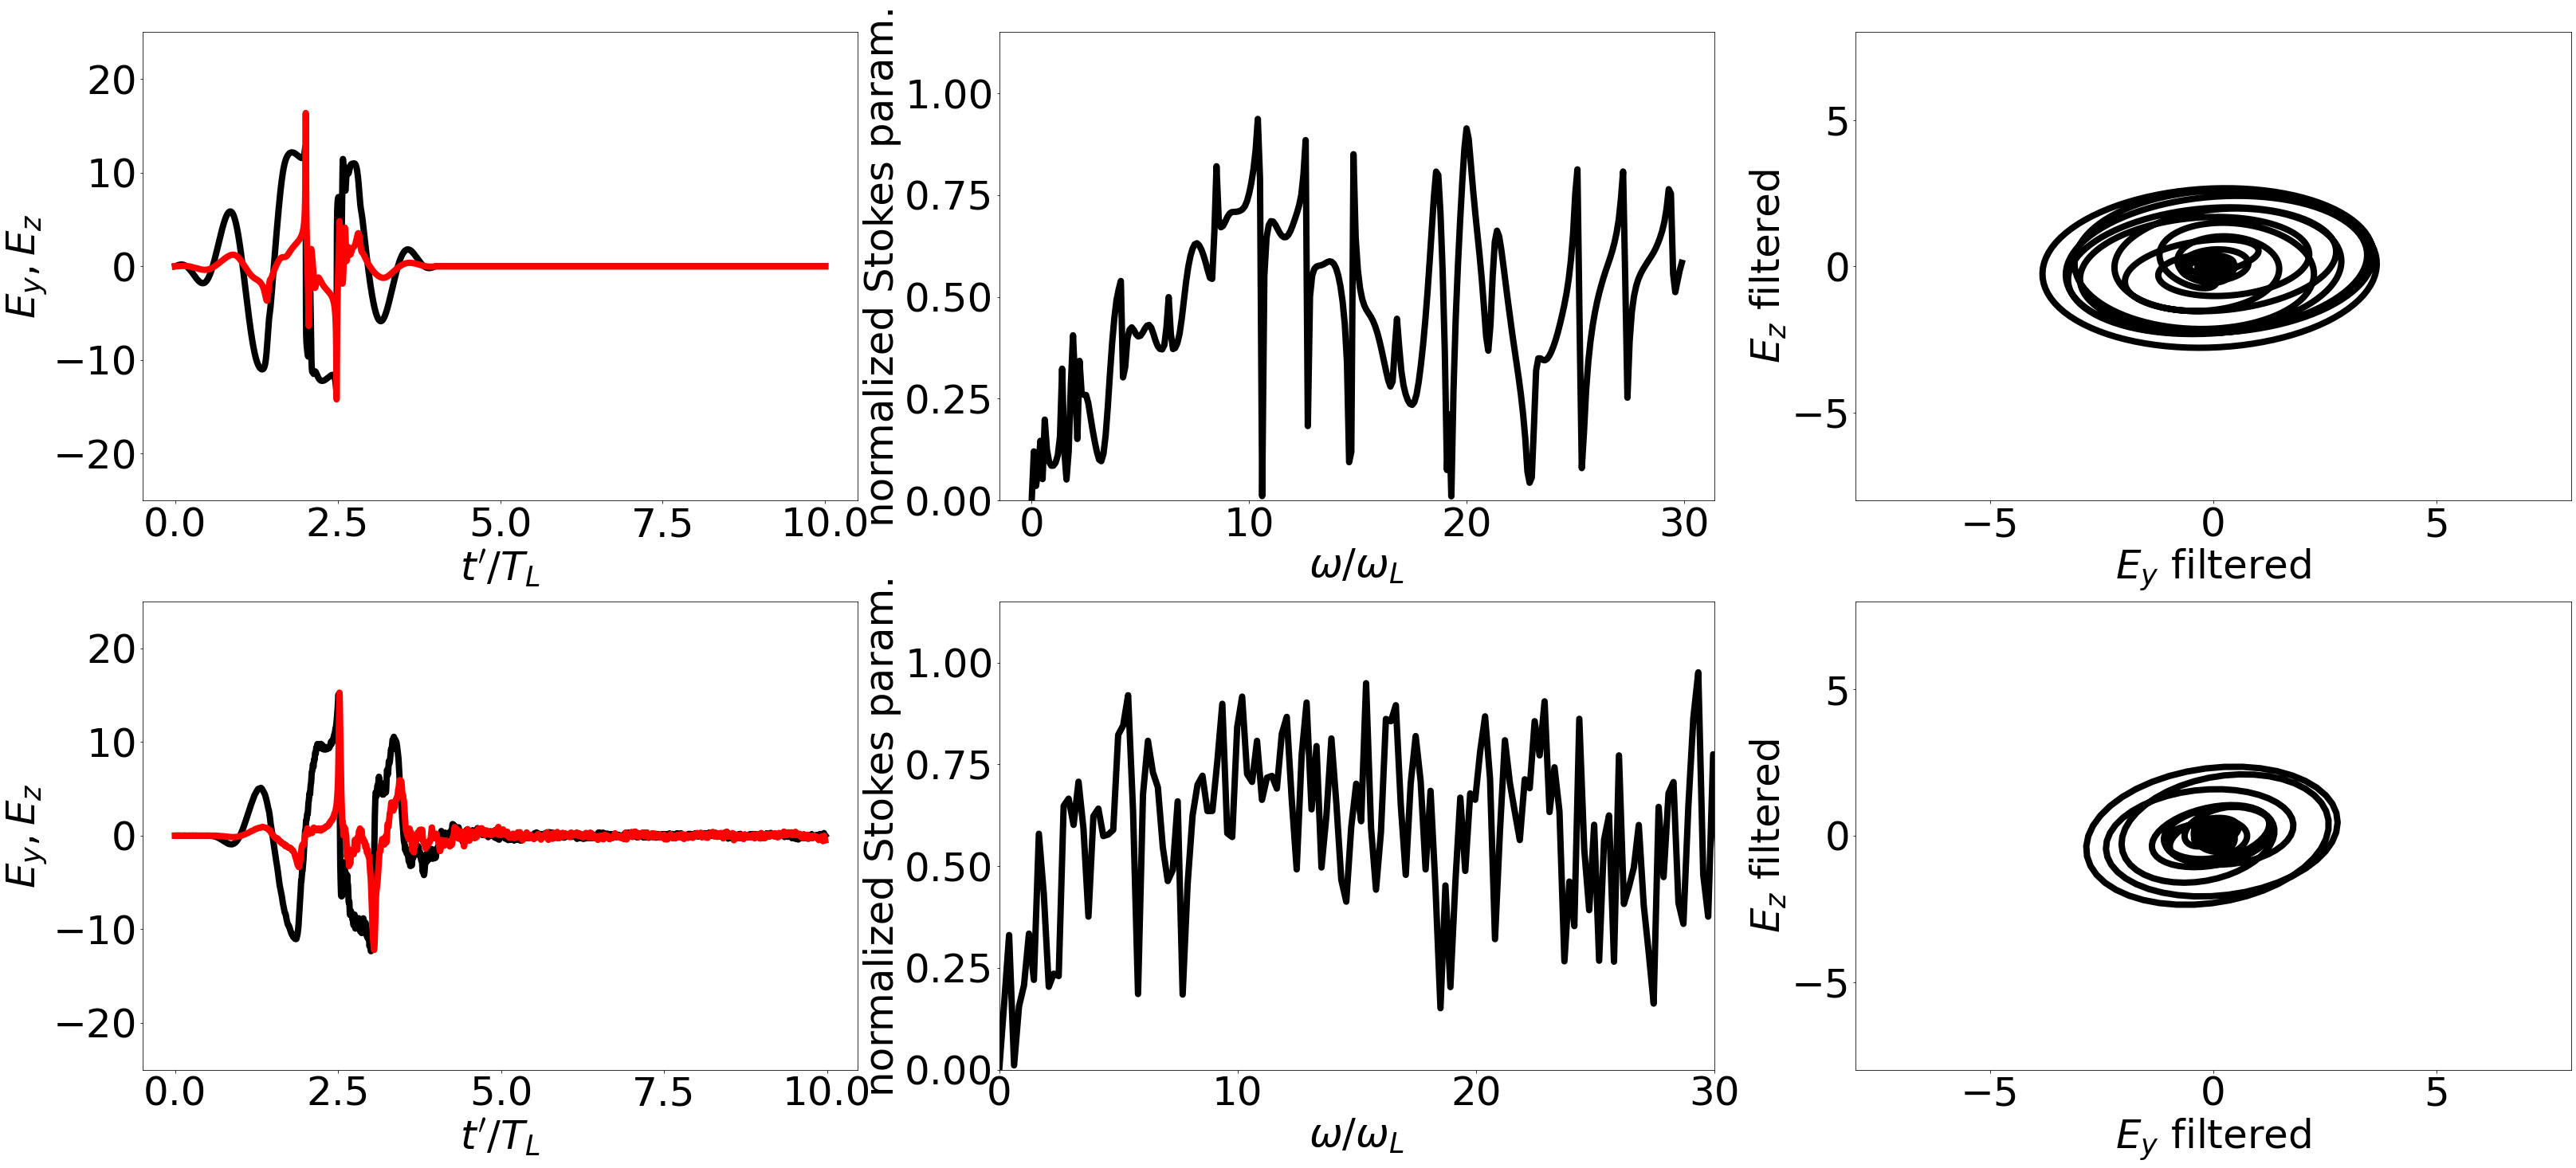

In [47]:
#frequencies.eps
'''
fig, ax = plt.subplots(1,3, figsize=(60,15))

ax[0].semilogy((anss[0,2]*2*np.pi), (np.abs(anss[0,0])/np.amax(abs(anss[0,0]))), lw=8, color='r')
ax[0].semilogy((anss[0,2]*2*np.pi), (np.abs(anss[0,1])/np.amax(abs(anss[0,1]))), lw=8, color='k')
ax[0].tick_params(axis='both', labelsize=60)
ax[0].set_xlabel("$\omega/\omega_L$", fontsize=60)
ax[0].set_ylabel("$E_y,E_z$", fontsize=60)
ax[0].set_title("$B_x=30$", fontsize=60)

ax[1].semilogy((anss[1,2]*2*np.pi), (abs(anss[1,0])/np.amax(abs(anss[1,0]))), lw=8, color='r')
ax[1].semilogy((anss[1,2]*2*np.pi), (abs(anss[1,1])/np.amax(abs(anss[1,1]))), lw=8, color='k')
ax[1].tick_params(axis='both', labelsize=60)
ax[1].set_xlabel("$\omega/\omega_L$", fontsize=60)
ax[1].set_ylabel("$E_y,E_z$", fontsize=60)
ax[1].set_title("$B_x=60$", fontsize=60)

ax[2].semilogy((anss[2,2]*2*np.pi), (abs(anss[2,0])/np.amax(abs(anss[2,0]))), lw=8, color='r')
ax[2].semilogy((anss[2,2]*2*np.pi), (abs(anss[2,1])/np.amax(abs(anss[2,1]))), lw=8, color = 'k')
ax[2].tick_params(axis='both', labelsize=60)
ax[2].set_xlabel("$\omega/\omega_L$", fontsize=60)
ax[2].set_ylabel("$E_y,E_z$", fontsize=60)
ax[2].set_title("$B_x=150$", fontsize=60);
plt.subplots_adjust(left=0.15, bottom=0.15)
plt.tight_layout()
plt.savefig('frequencies.pdf')
'''

#'''
#3by2.eps
#field_data_y = np.genfromtxt("./23_wide/Ey_2d_0.txt")
#field_data_z = np.genfromtxt("./23_wide/Ez_2d_0.txt")
field_data_y = np.genfromtxt("./18/Ey_2d_0.txt")
field_data_z = np.genfromtxt("./18/Ez_2d_0.txt")

filter_center=10
filter_width=2
bandgap_filter_minus=np.exp(-(anss[0][0]*2*np.pi-filter_center)**16/filter_width**16)
bandgap_filter_plus=np.exp(-(anss[0][0]*2*np.pi+filter_center)**16/filter_width**16)
bandgap_filter=bandgap_filter_minus+bandgap_filter_plus
sp_y=np.fft.fft(anss[0][1][:int(len(anss[0][1])/2)])
sp_z=np.fft.fft(anss[0][2][:int(len(anss[0][1])/2)])

sp_y_filt = bandgap_filter*sp_y
sp_z_filt = bandgap_filter*sp_z
filtered_y=np.fft.ifft(sp_y_filt)
filtered_z=np.fft.ifft(sp_z_filt)

t = np.linspace(0, 30, field_data_y.shape[0])
ind1=5000
ind2=7000
sp_y_2 = np.fft.fft(field_data_y[ind1:ind2])
sp_z_2 = np.fft.fft(field_data_z[ind1:ind2])
length = t[ind1:ind2].shape[-1]
w = np.fft.fftfreq(length, d = t[1]-t[0])

S0=sp_y_2*np.conjugate(sp_y_2)+sp_z_2*np.conjugate(sp_z_2)
S1=sp_y_2*np.conjugate(sp_y_2)-sp_z_2*np.conjugate(sp_z_2)
S2=2*np.real(sp_y_2*np.conjugate(sp_z_2))
S3=2*np.imag(sp_y_2*np.conjugate(sp_z_2))

chi=0.5*np.arctan( (S3+1e-200)/( np.sqrt(S1**2+S2**2)+1e-200) )

angle_diff_2 = abs(np.tan(chi.real))
bandgap_filter_minus=np.exp(-(w-filter_center)**16/filter_width**16)
bandgap_filter_plus=np.exp(-(w+filter_center)**16/filter_width**16)
bandgap_filter=bandgap_filter_minus+bandgap_filter_plus
sp_y_filt_2 = bandgap_filter*sp_y_2
sp_z_filt_2 = bandgap_filter*sp_z_2
filtered_y_2=np.fft.ifft(sp_y_filt_2)
filtered_z_2=np.fft.ifft(sp_z_filt_2)


fig, ax = plt.subplots(2,3, figsize=(45,20))

ax[0,1].plot((2*np.pi*anss[0][0][:300]), anss[0][3], color='k', lw=8)
ax[0,1].set_ylim(0,1.15)
ax[0,1].tick_params(axis='both', labelsize=50)
ax[0,1].set_xlabel("$\omega/\omega_L$", fontsize=50)
ax[0,1].set_ylabel("normalized Stokes param.", fontsize=50)

ax[0,0].plot(xi[:10000]/2/np.pi, anss[0][2][:10000], lw=8, color='k')
ax[0,0].plot(xi[:10000]/2/np.pi, anss[0][1][:10000], lw=8, color='r')
ax[0,0].tick_params(axis='both', labelsize=50)
ax[0,0].set_xlabel("$t'/T_L$", fontsize=50)
ax[0,0].set_ylabel("$E_y,E_z$", fontsize=50)
ax[0,0].set_ylim(-25,25)


#ax[0,2].semilogy((2*np.pi*anss[0,0][:400]), (np.abs(anss[0,4])/np.amax(abs(anss[0,4]))), lw=8, color='k')
#ax[0,2].semilogy((2*np.pi*anss[0,0][:400]), (np.abs(anss[0,5])/np.amax(abs(anss[0,5]))), lw=8, color='r')
#ax[0,2].tick_params(axis='both', labelsize=50)
#ax[0,2].set_xlabel("$\omega/\omega_L$", fontsize=50)
#ax[0,2].set_ylabel("$E_y,E_z$", fontsize=50)
ax[0,2].plot(filtered_z, filtered_y, lw=8, color='k')
ax[0,2].tick_params(axis='both', labelsize=50)
ax[0,2].set_xlabel("$E_y$ filtered", fontsize=50)
ax[0,2].set_ylabel("$E_z$ filtered", fontsize=50)
#ax[0,2].set_xlim(0.0,30.0)
#ax[0,2].set_ylim(1e-4,1.15)
ax[0,2].set_xlim(-8.0,8.0)
ax[0,2].set_ylim(-8.0,8.0)

ax[1,0].plot(t[ind1:9150]-t[ind1], field_data_y[ind1:9150], lw=8, color='k')
ax[1,0].plot(t[ind1:9150]-t[ind1], field_data_z[ind1:9150], lw=8, color='r')
ax[1,0].tick_params(axis='both', labelsize=50)
ax[1,0].set_xlabel("$t'/T_L$", fontsize=50)
ax[1,0].set_ylabel("$E_y,E_z$", fontsize=50)
ax[1,0].set_ylim(-25,25)

ax[1,1].plot(w[:length//2], angle_diff_2[:length//2], lw=8, color='k')
ax[1,1].set_xlim(0, 30)
ax[1,1].set_ylim(0, 1.15)
ax[1,1].tick_params(axis='both', labelsize=50)
ax[1,1].set_xlabel("$\omega/\omega_L$", fontsize=50)
ax[1,1].set_ylabel("normalized Stokes param.", fontsize=50)


#ax[1,2].semilogy(w[:length//2], (np.abs(sp_z_2[:length//2])/np.amax(abs(sp_z_2[:length//2]))), lw=8, color='k')
#ax[1,2].semilogy(w[:length//2], (np.abs(sp_y_2[:length//2])/np.amax(abs(sp_y_2[:length//2]))), lw=8, color='r')
#ax[1,2].tick_params(axis='both', labelsize=50)
#ax[1,2].set_xlabel("$\omega/\omega_L$", fontsize=50)
#ax[1,2].set_ylabel("$E_y,E_z$", fontsize=50)
ax[1,2].plot(filtered_y_2, filtered_z_2, lw=8, color='k')
ax[1,2].tick_params(axis='both', labelsize=50)
ax[1,2].set_xlabel("$E_y$ filtered", fontsize=50)
ax[1,2].set_ylabel("$E_z$ filtered", fontsize=50)
#ax[1,2].set_xlim(0,30.0)
#ax[1,2].set_ylim(1e-4, 1.15)
ax[1,2].set_xlim(-8.0,8.0)
ax[1,2].set_ylim(-8.0,8.0)

plt.tight_layout()
plt.savefig("3by2.pdf");
# import pickle
# file = open('q_table.pkl', 'rb')
# q_table = pickle.load(file)
# file.close()
#'''

'''
#parameters.eps
#el = anss[:,0].reshape(100,100)
#k1 = anss[:,1].reshape(100,100)
#k2 = anss[:,2].reshape(100,100)
el = np.loadtxt("eell.txt")
k1 = np.loadtxt("kk11.txt")
k2= np.loadtxt("kk22.txt")
fig, ax = plt.subplots(1,3, figsize=(45,20))

ax[0].imshow(el.T[:,1:])
ax[0].set_xlabel("$a_0$", fontsize=60)
ax[0].set_ylabel("$B_x$", fontsize=60)
ax[0].tick_params(axis='both', labelsize=60)
ax[0].set_title("Average Ellipticity", fontsize=60)
ax[0].set_xticks(np.linspace(0,100,100)[::20], np.linspace(0,199,100)[::20].astype(int))
ax[0].set_yticks(np.linspace(0,100,100)[::20], np.linspace(0,199,100)[::20].astype(int))
im = ax[1].imshow(k1.T)
im.set_clim(0,1)
ax[1].set_xlabel("$a_0$", fontsize=60)
ax[1].set_ylabel("$B_x$", fontsize=60)
ax[1].tick_params(axis='both', labelsize=60)
ax[1].set_title("$k_y$", fontsize=60)
ax[1].set_xticks(np.linspace(0,100,100)[::20], np.linspace(0,199,100)[::20].astype(int))
ax[1].set_yticks(np.linspace(0,100,100)[::20], np.linspace(0,199,100)[::20].astype(int))
im = ax[2].imshow(k2.T)
im.set_clim(0,1)
ax[2].tick_params(axis='both', labelsize=60)
ax[2].set_xlabel("$a_0$", fontsize=60)
ax[2].set_ylabel("$B_x$", fontsize=60)
ax[2].set_title("$k_z$", fontsize=60)
ax[2].set_xticks(np.linspace(0,100,100)[::20], np.linspace(0,199,100)[::20].astype(int))
ax[2].set_yticks(np.linspace(0,100,100)[::20], np.linspace(0,199,100)[::20].astype(int))

e2 = patches.Ellipse((33, 55), 20, 80,
                     angle=-31, linewidth=6, color='red', fill=False, zorder=2)


ax[0].add_patch(e2)

cbaxes = fig.add_axes([0.06, 0.04, 0.925, 0.05])
cbaxes.tick_params(axis='both', labelsize=60)
cb = fig.colorbar(im, ax=ax, cax=cbaxes, orientation='horizontal')
#plt.subplots_adjust(left=0.15, bottom=0.15)
plt.tight_layout()
plt.savefig("parameters.pdf")
'''

In [49]:
# import pickle
# file = open('fig_2.pkl', 'wb')
# pickle.dump(anss, file)
# # file.close()

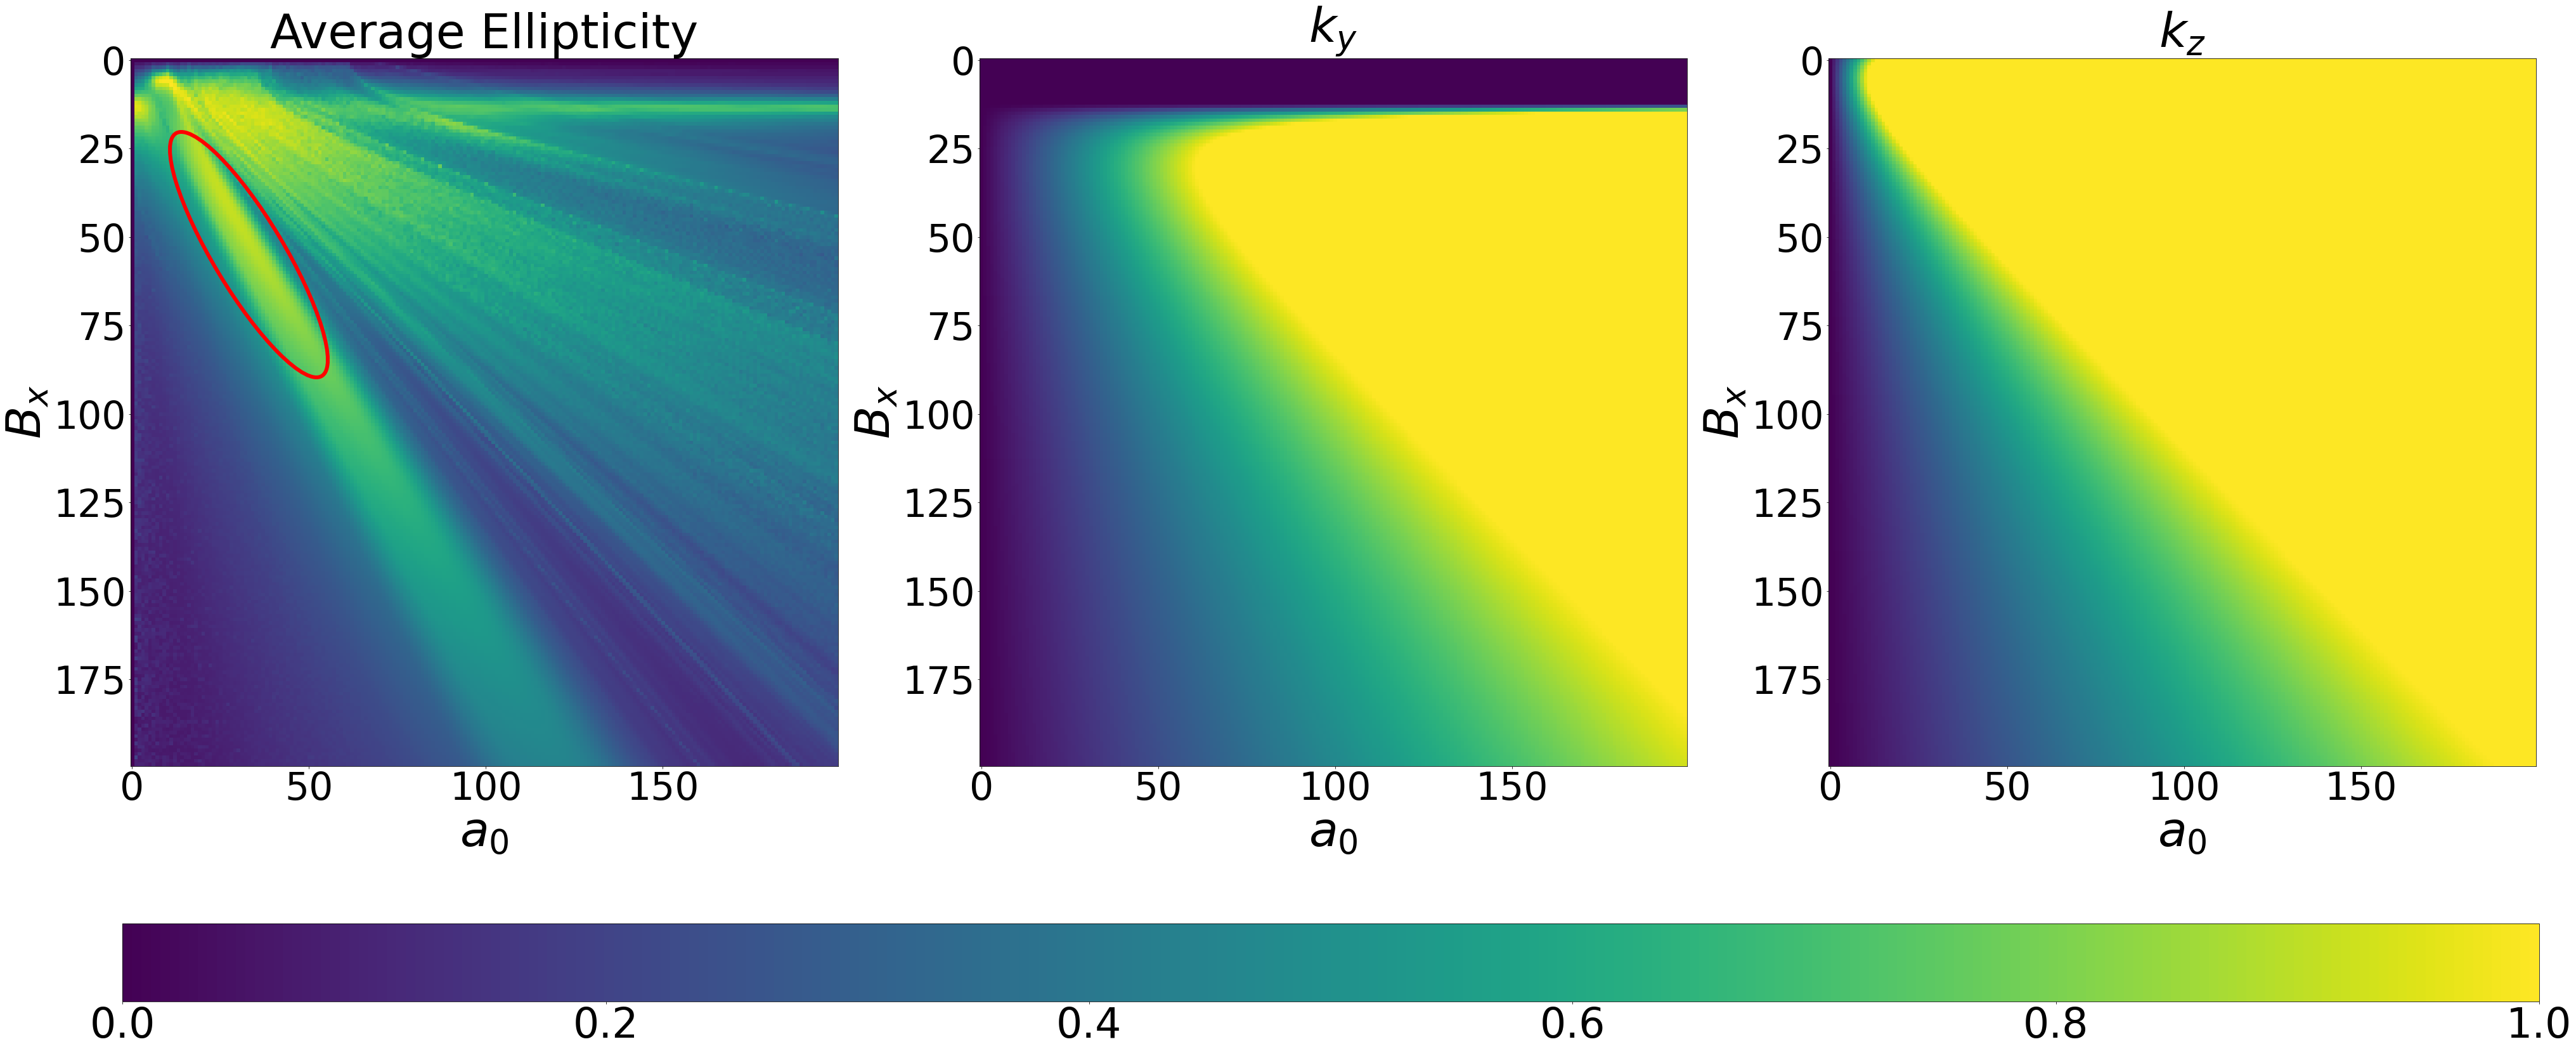

In [14]:
an = np.loadtxt("1.txt")
el = an[:,0].reshape(200,200)
k1 = an[:,1].reshape(200,200)
k2 = an[:,2].reshape(200,200)

#el = np.loadtxt("el.txt")
#k1 = np.loadtxt("k1.txt")
#k2= np.loadtxt("k2.txt")
fig, ax = plt.subplots(1,3, figsize=(68,34))

ax[0].imshow(el.T)#, cmap = 'ocean')
ax[0].set_xlabel("$a_0$", fontsize=75)
ax[0].set_ylabel("$B_x$", fontsize=75)
ax[0].tick_params(axis='both', labelsize=60)
ax[0].set_title("Average Ellipticity", fontsize=75)
im = ax[1].imshow(k1.T)#, cmap = 'ocean')
im.set_clim(0,1)
ax[1].set_xlabel("$a_0$", fontsize=75)
ax[1].set_ylabel("$B_x$", fontsize=75)
ax[1].tick_params(axis='both', labelsize=60)
ax[1].set_title("$k_y$", fontsize=75)
im = ax[2].imshow(k2.T)#, cmap = 'ocean')
im.set_clim(0,1)
ax[2].tick_params(axis='both', labelsize=60)
ax[2].set_xlabel("$a_0$", fontsize=75)
ax[2].set_ylabel("$B_x$", fontsize=75)
ax[2].set_title("$k_z$", fontsize=75)

e2 = patches.Ellipse((33, 55), 20, 80,
                     angle=-31, linewidth=6, color='red', fill=False, zorder=2)


ax[0].add_patch(e2)

cbaxes = fig.add_axes([0.1225, 0.123, 0.7785, 0.05])
cbaxes.tick_params(axis='both', labelsize=65)
cb = fig.colorbar(im, ax=ax, cax=cbaxes, orientation='horizontal')
plt.savefig("2.png")

2.0120918984280527
10.060459492140264
20.12091898428053
(12481, 10)


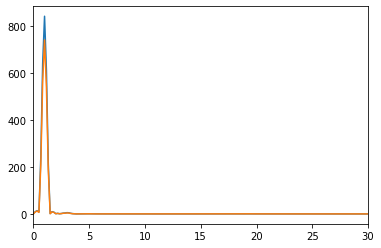

In [30]:
sp_y = np.fft.fft(data_y[ind1:ind2])
sp_z = np.fft.fft(data_z[ind1:ind2])
w = np.fft.fftfreq(length, d = t[1]-t[0])

plt.plot(w[:len(sp_z)//2], abs(sp_y[:len(sp_y)//2 ]))
plt.plot(w[:len(sp_z)//2], abs(sp_z[:len(sp_z)//2]))
plt.xlim(0,30)
print(w[12])
print(w[60])
print(w[120])
#plt.plot(data_z[ind1:ind2])
#plt.plot(data_y[ind1:ind2])
print(np.genfromtxt(folder+"Ey.txt").shape)

In [11]:
ells = np.zeros(201)
for num in range(201):
    folder = "./a60/new_output_" + str(num) + "/"
    #folder = "./a0=30/a0=30_" + str(num) + "/"
    data_y = np.genfromtxt(folder+"Ey.txt")[:,9]
    data_z = np.genfromtxt(folder+"Ez.txt")[:,9]


    t = np.linspace(0, 30, data_y.shape[0])
    ind1=7000
    ind2=-3000
    sp_y = np.fft.fft(data_y[ind1:ind2])[0:130]
    sp_z = np.fft.fft(data_z[ind1:ind2])[0:130]

    length = t[ind1:ind2].shape[-1]
    w = np.fft.fftfreq(length, d = t[1]-t[0])[0:130]

    S0=sp_y*np.conjugate(sp_y)+sp_z*np.conjugate(sp_z)
    S1=sp_y*np.conjugate(sp_y)-sp_z*np.conjugate(sp_z)
    S2=2*np.real(sp_y*np.conjugate(sp_z))
    S3=2*np.imag(sp_y*np.conjugate(sp_z))

    chi=0.5*np.arctan( (S3+1e-200)/( np.sqrt(S1**2+S2**2)+1e-200) )


    
    angle_diff = abs(np.tan(chi.real))[12:60]
    peaks, _ = find_peaks(angle_diff)
    #angle_diff = abs(np.sin(np.angle(sp_y)-np.angle(sp_z)))

    average_ellip = np.mean(angle_diff)#[peaks])
    ells[num] = average_ellip
#ells = np.loadtxt("3.txt")

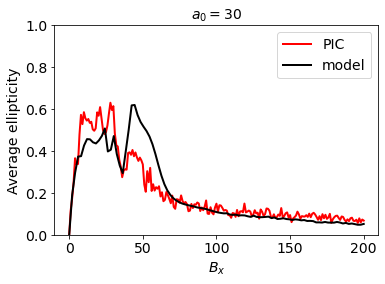

In [137]:
dom = np.linspace(0,200,100)
plt.plot(ells, lw=2, label="PIC", color='r')
plt.title("$a_0=30$", fontsize=14)
plt.gca().tick_params(which="both", labelsize=14)
el = np.loadtxt("eell.txt")
plt.plot(dom, el[15], lw=2, label="model", color="k")
plt.ylabel("Average ellipticity", fontsize=14)
plt.xlabel("$B_x$", fontsize=14)
plt.legend(fontsize=14)
plt.subplots_adjust(left=0.15, bottom=0.15)
plt.ylim(0,1)
plt.savefig("a30.pdf")

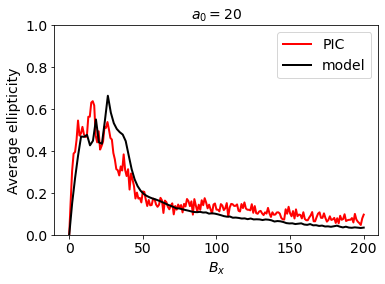

In [7]:
dom = np.linspace(0,200,100)
plt.plot(ells, lw=2, label="PIC", color='r')
plt.title("$a_0=20$", fontsize=14)
plt.gca().tick_params(which="both", labelsize=14)
el = np.loadtxt("eell.txt")
plt.plot(dom, el[10], lw=2, label="model", color="k")
plt.ylabel("Average ellipticity", fontsize=14)
plt.xlabel("$B_x$", fontsize=14)
plt.legend(fontsize=14)
plt.subplots_adjust(left=0.15, bottom=0.15)
plt.ylim(0,1)
plt.savefig("a20.pdf")

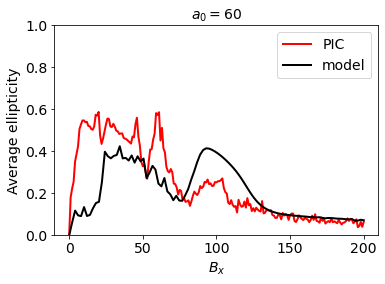

In [12]:
dom = np.linspace(0,200,100)
plt.plot(ells, lw=2, label="PIC", color='r')
plt.title("$a_0=60$", fontsize=14)
plt.gca().tick_params(which="both", labelsize=14)
el = np.loadtxt("eell.txt")
plt.plot(dom, el[30], lw=2, label="model", color="k")
plt.ylabel("Average ellipticity", fontsize=14)
plt.xlabel("$B_x$", fontsize=14)
plt.legend(fontsize=14)
plt.subplots_adjust(left=0.15, bottom=0.15)
plt.ylim(0,1)
plt.savefig("a60.pdf")